<a href="https://colab.research.google.com/github/Nikita-devel/DS_Hw2_2/blob/main/Hw2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [127]:
import matplotlib.pyplot as plt
import pandas as pd

URL="https://uk.wikipedia.org/wiki/%D0%9D%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%BD%D1%8F_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D0%B8"
TABLE_NAME = "Коефіцієнт народжуваності в регіонах України"
data = pd.read_html(URL, match=TABLE_NAME)
if data:
  df= data[0]
assert df is not None, "DATA NOT READ FROM THE WIKI"

In [128]:
print(df.head())
print(df.shape)

             Регіон   1950   1960   1970  1990  2000  2012 2014 2019
0              Крим  230.0  206.0  160.0   130    73   126    —    —
1         Вінницька  224.0  192.0  142.0   124    84   112  109   76
2         Волинська  247.0  250.0  179.0   153   112   148  141  101
3  Дніпропетровська  204.0  204.0  151.0   123    71   112  111   71
4          Донецька  271.0  214.0  140.0   109    61    98   82    —
(28, 9)


In [129]:
df = df.replace("—", "NaN")
print(df.head())

             Регіон   1950   1960   1970  1990  2000  2012 2014 2019
0              Крим  230.0  206.0  160.0   130    73   126  NaN  NaN
1         Вінницька  224.0  192.0  142.0   124    84   112  109   76
2         Волинська  247.0  250.0  179.0   153   112   148  141  101
3  Дніпропетровська  204.0  204.0  151.0   123    71   112  111   71
4          Донецька  271.0  214.0  140.0   109    61    98   82  NaN


In [130]:
print(df[df.columns].dtypes)

Регіон     object
1950      float64
1960      float64
1970      float64
1990        int64
2000        int64
2012        int64
2014       object
2019       object
dtype: object


In [131]:
print(df[df.columns[1:]].dtypes)
df[df.columns[1:]] = df[df.columns[1:]].apply(pd.to_numeric, errors='coerce')

print(df.dtypes)

1950    float64
1960    float64
1970    float64
1990      int64
2000      int64
2012      int64
2014     object
2019     object
dtype: object
Регіон     object
1950      float64
1960      float64
1970      float64
1990        int64
2000        int64
2012        int64
2014      float64
2019      float64
dtype: object


In [132]:
df.isnull().sum()

Регіон    0
1950      2
1960      1
1970      1
1990      0
2000      0
2012      0
2014      2
2019      4
dtype: int64

In [133]:
df = df.drop(df.index[-1])
print(df)

               Регіон   1950   1960   1970  1990  2000  2012   2014   2019
0                Крим  230.0  206.0  160.0   130    73   126    NaN    NaN
1           Вінницька  224.0  192.0  142.0   124    84   112  109.0   76.0
2           Волинська  247.0  250.0  179.0   153   112   148  141.0  101.0
3    Дніпропетровська  204.0  204.0  151.0   123    71   112  111.0   71.0
4            Донецька  271.0  214.0  140.0   109    61    98   82.0    NaN
5         Житомирська  261.0  223.0  159.0   129    89   122  120.0   79.0
6        Закарпатська  314.0  273.0  207.0   168   115   151  146.0  104.0
7          Запорізька  219.0  197.0  150.0   124    71   106  106.0   68.0
8   Івано-Франківська  243.0  248.0  182.0   155   103   124  122.0   88.0
9            Київська  204.0  189.0  156.0   123    73   122  121.0   80.0
10     Кіровоградська  216.0  171.0  145.0   126    79   110  108.0   68.0
11          Луганська  262.0  235.0  144.0   116    62    96   51.0    NaN
12          Львівська  23

In [134]:
df=df.fillna(df.mean(numeric_only=True))
df

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,230.00,206.000000,160.0,130,73,126,111.44,80.173913
1,Вінницька,224.00,192.000000,142.0,124,84,112,109.00,76.000000
2,Волинська,247.00,250.000000,179.0,153,112,148,141.00,101.000000
3,Дніпропетровська,204.00,204.000000,151.0,123,71,112,111.00,71.000000
4,Донецька,271.00,214.000000,140.0,109,61,98,82.00,80.173913
5,Житомирська,261.00,223.000000,159.0,129,89,122,120.00,79.000000
6,Закарпатська,314.00,273.000000,207.0,168,115,151,146.00,104.000000
7,Запорізька,219.00,197.000000,150.0,124,71,106,106.00,68.000000
8,Івано-Франківська,243.00,248.000000,182.0,155,103,124,122.00,88.000000
9,Київська,204.00,189.000000,156.0,123,73,122,121.00,80.000000


In [135]:
m = df.mean(numeric_only=True)
print(m)
print(m.mean(numeric_only=True))

1950    231.040000
1960    207.576923
1970    156.000000
1990    130.592593
2000     82.222222
2012    116.555556
2014    111.440000
2019     80.173913
dtype: float64
139.45015081134648


In [136]:
m = df['2019'].mean()
df[ df['2019'] >= df['2019'].mean()][["Регіон", '2019']].sort_values(by='2019',ascending=False)


,Регіон,2019
25,Київ,110.0
16,Рівненська,107.0
6,Закарпатська,104.0
2,Волинська,101.0
23,Чернівецька,92.0
8,Івано-Франківська,88.0
14,Одеська,88.0
12,Львівська,87.0
20,Херсонська,81.0


In [137]:
df.iloc[df['2014'].idxmax()][["Регіон"]]

Регіон    Рівненська
Name: 16, dtype: object

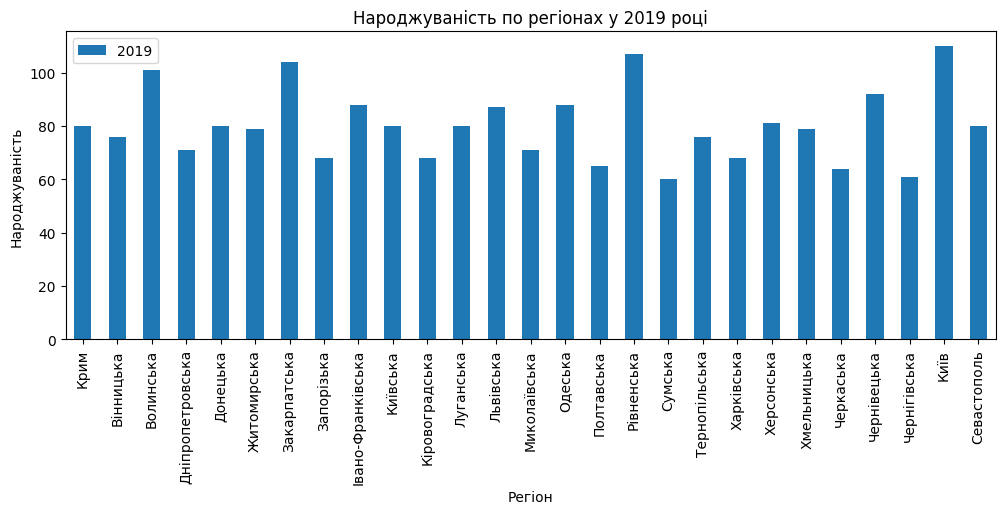

In [139]:
pl = df[["Регіон",'2019']].plot(figsize=(12,4),kind="bar", x="Регіон", ylabel="Народжуваність", title="Народжуваність по регіонах у 2019 році")
plt.show()

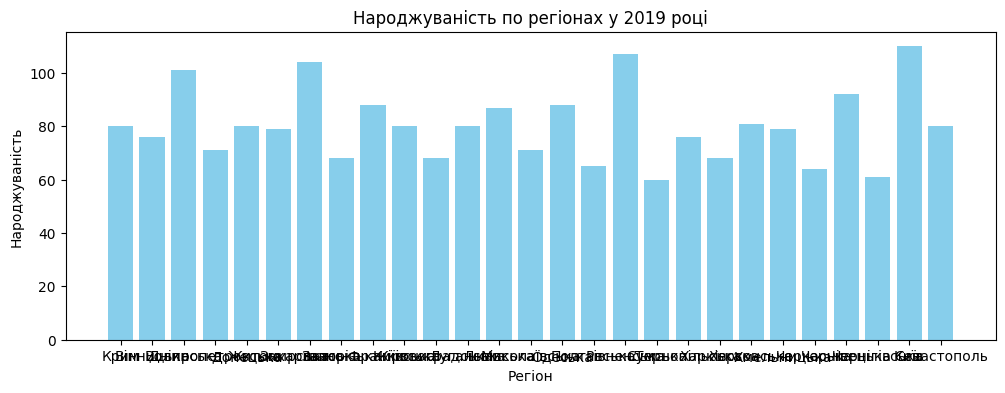

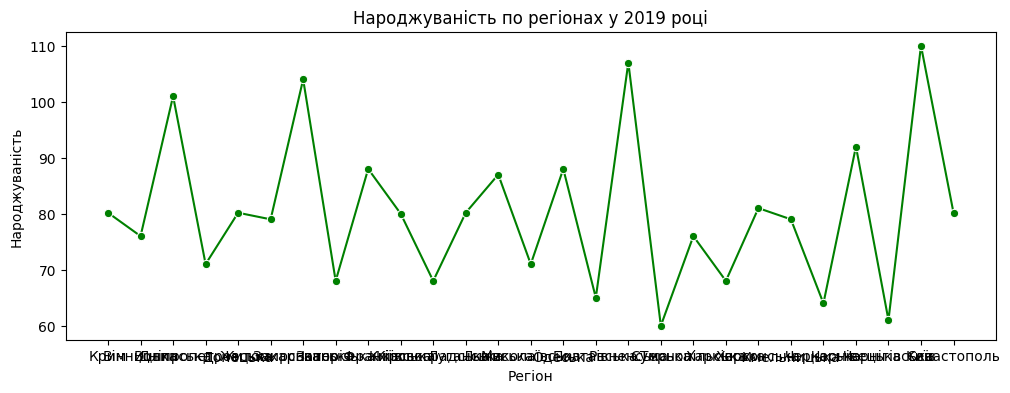

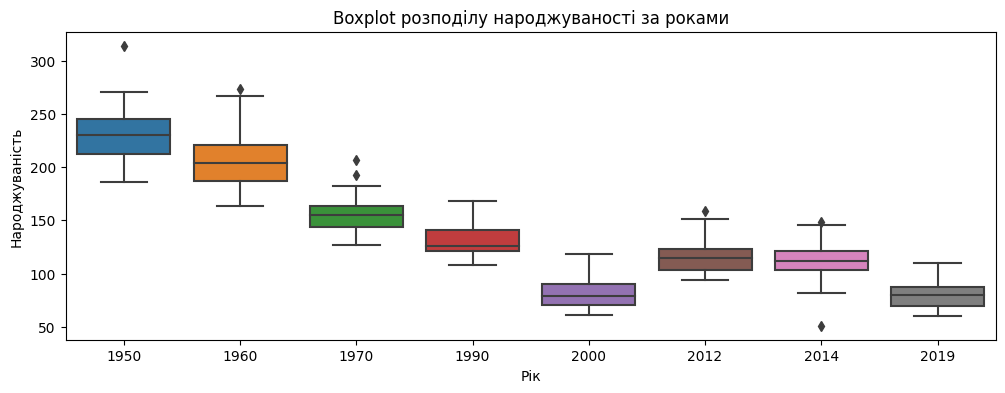

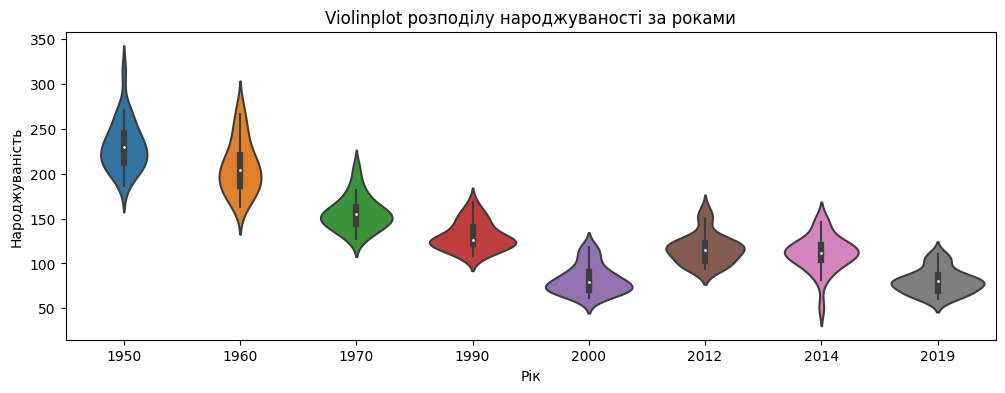

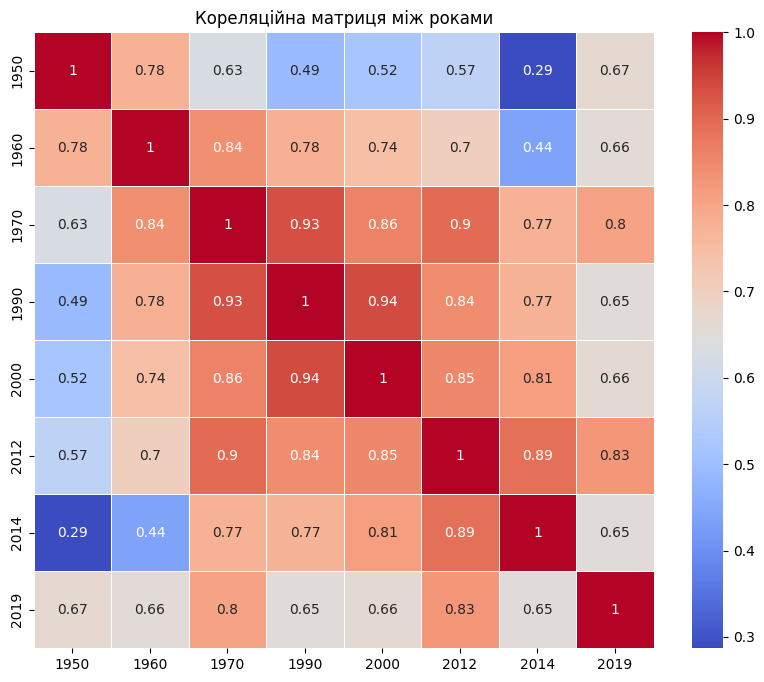

In [140]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

URL = "https://uk.wikipedia.org/wiki/%D0%9D%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%BD%D1%8F_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D0%B8"
TABLE_NAME = "Коефіцієнт народжуваності в регіонах України"
data = pd.read_html(URL, match=TABLE_NAME)

if data:
    df = data[0]
    assert df is not None, "DATA NOT READ FROM THE WIKI"
    df = df.replace("—", "NaN")
    df[df.columns[1:]] = df[df.columns[1:]].apply(pd.to_numeric, errors='coerce')

    df = df.drop(df.index[-1])

    df = df.fillna(df.mean(numeric_only=True))

    plt.figure(figsize=(12, 4))
    plt.bar(df['Регіон'], df['2019'], color='skyblue')
    plt.xlabel('Регіон')
    plt.ylabel('Народжуваність')
    plt.title('Народжуваність по регіонах у 2019 році')
    plt.show()

    plt.figure(figsize=(12, 4))
    sns.lineplot(data=df, x='Регіон', y='2019', marker='o', color='green')
    plt.xlabel('Регіон')
    plt.ylabel('Народжуваність')
    plt.title('Народжуваність по регіонах у 2019 році')
    plt.show()

    plt.figure(figsize=(12, 4))
    sns.boxplot(data=df[df.columns[1:]])
    plt.xlabel('Рік')
    plt.ylabel('Народжуваність')
    plt.title('Boxplot розподілу народжуваності за роками')
    plt.show()

    plt.figure(figsize=(12, 4))
    sns.violinplot(data=df[df.columns[1:]])
    plt.xlabel('Рік')
    plt.ylabel('Народжуваність')
    plt.title('Violinplot розподілу народжуваності за роками')
    plt.show()

    plt.figure(figsize=(10, 8))
    sns.heatmap(df[df.columns[1:]].corr(), annot=True, cmap='coolwarm', linewidths=.5)
    plt.title('Кореляційна матриця між роками')
    plt.show()
